## Installing External Dependencies

In [ ]:
!pip install keras
!pip install tensorflow
!pip install seaborn

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset 

In [2]:
data=pd.read_csv('Dataset1.csv')
data.head(3)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday


## Combining the Hotel Name and Hotel Room Features
Hotel room is not independent of the actual hotel name. Precisely, Room 1 in Hotel A is not the same as Room 1 in Hotel B. Hence we need to concatenate these features to form a new feature and drop the old hotel rooms feature.

In [3]:
data['Hotel-Room']=data['Hotel name']+data['Nr. rooms'].map(str)
data.drop('Hotel name',axis=1,inplace=True)
data.drop('Nr. rooms',axis=1,inplace=True)
data.head(3)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel stars,User continent,Member years,Review month,Review weekday,Hotel-Room
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,3,North America,9,January,Thursday,Circus Circus Hotel & Casino Las Vegas3773
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,3,North America,3,January,Friday,Circus Circus Hotel & Casino Las Vegas3773
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,3,North America,2,February,Saturday,Circus Circus Hotel & Casino Las Vegas3773


In [4]:
data['Hotel stars']=data['Hotel stars'].apply(lambda x:np.mean(list(map(int,x.split(',')))))
data.dtypes

User country          object
Nr. reviews            int64
Nr. hotel reviews      int64
Helpful votes          int64
Score                  int64
Period of stay        object
Traveler type         object
Swimming Pool         object
Exercise Room         object
Basketball Court      object
Yoga Classes          object
Club                  object
Free Wifi             object
Hotel stars          float64
User continent        object
Member years           int64
Review month          object
Review weekday        object
Hotel-Room            object
dtype: object

## Removing Outliers
The column Member years contains an outlier having value as -ve. We remove this row completely to avoid polluting the dataset.

In [5]:
print(data.describe())
idx=(data['Member years']<0).idxmax()
data.drop(idx,inplace=True)

       Nr. reviews  Nr. hotel reviews  Helpful votes       Score  Hotel stars  \
count   504.000000         504.000000     504.000000  504.000000   504.000000   
mean     48.130952          16.023810      31.751984    4.123016     4.214286   
std      74.996426          23.957953      48.520783    1.007302     0.733814   
min       1.000000           0.000000       0.000000    1.000000     3.000000   
25%      12.000000           5.000000       8.000000    4.000000     4.000000   
50%      23.500000           9.000000      16.000000    4.000000     4.000000   
75%      54.250000          18.000000      35.000000    5.000000     5.000000   
max     775.000000         263.000000     365.000000    5.000000     5.000000   

       Member years  
count    504.000000  
mean       0.767857  
std       80.692897  
min    -1806.000000  
25%        2.000000  
50%        4.000000  
75%        6.000000  
max       13.000000  


## One Hot Encoding the Categorical Classes
For categorical quantities it is essential to one hot encode them (LabelBinarization). We cannot simply label encode them as they do not form an intrinsically continuous series. We here provide code for both these methods but OneHotEncodeing is always superior so we use that one. Moreover, if we require to process further data, we will need the encoders used on the training dataset so we store them in the encoders dictionary for later use.

In [6]:
from collections import defaultdict
from sklearn.preprocessing import LabelBinarizer
encoders = defaultdict(LabelBinarizer)
categorical_columns = data.select_dtypes(include=['object']).columns
for categorical_column in categorical_columns:
    enc=encoders[categorical_column]
    one_hot_encoding=enc.fit_transform(data[categorical_column])
    if len(enc.classes_) ==2:
        data[categorical_column+' binary'] = one_hot_encoding
    else:
        for i,column in enumerate(encoders[categorical_column].classes_):
            data[column]=one_hot_encoding[:,i]
data.drop(categorical_columns, axis=1, inplace=True)
data.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Member years,Australia,Belgium,Brazil,Canada,...,The Cromwell188,The Palazzo Resort Hotel Casino3025,The Venetian Las Vegas Hotel4027,The Westin las Vegas Hotel Casino & Spa826,Treasure Island- TI Hotel & Casino2884,Tropicana Las Vegas - A Double Tree by Hilton Hotel1467,Trump International Hotel Las Vegas1282,Tuscany Las Vegas Suites & Casino716,Wyndham Grand Desert787,Wynn Las Vegas2700
0,11,4,13,5,3.0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,119,21,75,3,3.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36,9,25,5,3.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,7,14,4,3.0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,2,4,3.0,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Not Used
"""
    from collections import defaultdict
    from sklearn.preprocessing import LabelEncoder
    encoders = defaultdict(LabelEncoder)
    categorical_columns = data.select_dtypes(include='object').columns
    data[categorical_columns]=data[categorical_columns].apply(lambda x: encoders[x.name].fit_transform(x))
    data.head()
""";

# Append the 'score' column to the end

In [12]:
cols=data.columns.tolist()
cols.remove('Score')
cols.append('Score')
data=data[cols]
print(cols)

['Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Hotel stars', 'Member years', 'Australia', 'Belgium', 'Brazil', 'Canada', 'China', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hawaii', 'Honduras', 'Hungary', 'India', 'India ', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Korea', 'Kuwait', 'Malaysia', 'Mexico', 'Netherlands', 'New Zeland', 'Norway', 'Phillippines', 'Puerto Rico', 'Saudi Arabia', 'Scotland', 'Singapore', 'South Africa', 'Spain', 'Swiss', 'Switzerland', 'Syria', 'Taiwan', 'Thailand', 'UK', 'USA', 'United Arab Emirates', 'Dec-Feb', 'Jun-Aug', 'Mar-May', 'Sep-Nov', 'Business', 'Couples', 'Families', 'Friends', 'Solo', 'Swimming Pool binary', 'Exercise Room binary', 'Basketball Court binary', 'Yoga Classes binary', 'Club binary', 'Free Wifi binary', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'April', 'August', 'December', 'February', 'January', 'July', 'Jun

## Convert to numpy ndarray and convert y to categorical variable
It is the requrement of keras that multiclass data should be converted into categorical format.

In [13]:
from keras.utils import np_utils
categories=['score '+str(i) for i in range(5)]
X=data.drop('Score',axis=1).values
y=data['Score'].values-1

In [15]:
y = np_utils.to_categorical(y, len(categories))
print(X.shape)
print(y.shape)

(503, 114)
(503, 5)


In [16]:
from collections import Counter
Counter(list(np.argmax(y,axis=1)+1))


Counter({5: 226, 3: 72, 4: 164, 2: 30, 1: 11})

## Split Data into Train and Test sets
For validation we need to keep a portion of the dataset seperate to evaluate our model later. `train_test_split` also automatically shuffles the dataset so validation is more accurate.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

## First Attempt: Random Forest
We see that random forest is not capable of handling this dataset as it performs poorly even with generous depth.

In [18]:
from sklearn.ensemble  import RandomForestClassifier
dt = RandomForestClassifier(n_estimators=200, max_depth=18,random_state=0)
history=dt.fit(X_train, y_train)
dt.score(X_test, y_test)

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.25301204819277107

## Attempt Two: Neural Net
Performs significantly better and is able to double the performance 

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,RMSprop,Adagrad
sgd=Adagrad(lr=0.02, epsilon=.1, decay=1e-5)
model = Sequential()
model.add(Dense(20, input_shape=X.shape[1:], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(len(categories),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=50, batch_size=10,validation_data=(X_test,y_test),verbose=True)
scores = model.evaluate(X_test, y_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 337 samples, validate on 166 samples
Epoch 1/50
337/337 [==============================] - 0s 1ms/step - loss: 1.9308 - acc: 0.3531 - val_loss: 1.4718 - val_acc: 0.3855
Epoch 2/50
337/337 [==============================] - 0s 449us/step - loss: 1.4962 - acc: 0.4154 - val_loss: 1.3129 - val_acc: 0.4578
Epoch 3/50
337/337 [==============================] - 0s 332us/step - loss: 1.3766 - acc: 0.4748 - val_loss: 1.4564 - val_acc: 0.4036
Epoch 4/50
337/337 [==============================] - 0s 334us/step - loss: 1.3255 - acc: 0.4718 - val_loss: 1.4374 - val_acc: 0.4217
Epoch 5/50
337/337 [==============================] - 0s 489us/step - loss: 1.2861 - acc: 0.4866 - val_loss: 1.2891 - val_acc: 0.4639
Epoch 6/50
337/337 [==============================] - 0s 336us/step - loss: 1.2512 - acc: 0.4985 - val_loss: 1.3446 - val_acc: 0.4458
Epoch 7/50
337/337 [==============================] - 0s 326us/step - loss: 1.2413 - acc: 0.4985 - val_loss: 1.3411 - val_acc: 0.4518
Epoch 8/50
337/337

In [20]:
import os
import sklearn.metrics


def plot_history(history):
    if history.get('acc') and history.get('val_acc'):
        plt.plot(history['acc'], marker='.', label='train_accuracy')
        axes = plt.gca()
        axes.set_ylim([0,1])
        plt.plot(history['val_acc'], marker='.', label='validation_accuracy')
        axes = plt.gca()
        axes.set_ylim([0,1])
        plt.title('Model accuracy')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()
        plt.figure()
    

    if history.get('loss') and history.get('val_loss'):
        plt.plot(history['loss'], marker='.', label='train_loss')
        plt.plot(history['val_loss'], marker='.', label='validation_loss')
        plt.title('Model loss')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.grid()
        plt.legend(loc='lower right')
        plt.show()


def save_metrics(y_test, y_pred, categories):
    y_test = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    classification_report = sklearn.metrics.classification_report(y_test, y_pred, target_names=categories, digits=5)
    confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
    confusion_matrix = confusion_matrix.astype('float')
    

    plt.imshow(confusion_matrix, interpolation='nearest', cmap='hot')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return confusion_matrix,classification_report


# Accuracy vs Epochs and Loss vs Epochs

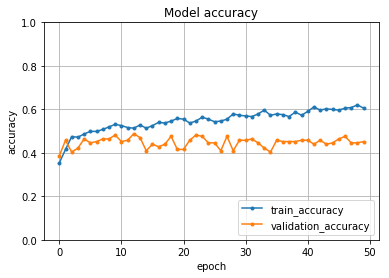

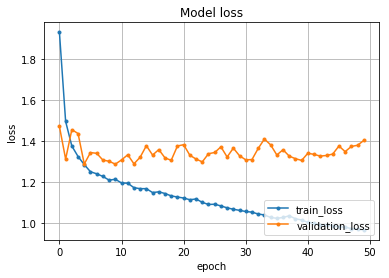

In [21]:
plot_history(history.history)

## Predicted Y for X_test  (Solution of  Question 1)

In [ ]:
y_pred=model.predict(X_test)

## Saving the Model

In [22]:
def save_model(model):
    with open(os.path.join(".","saved") + '.json', 'w')as model_file:
        model_file.write(model.to_json())
    model.save_weights(os.path.join(".","saved") + '.h5')
    print('Saved model successfully')
save_model(model)

Saved model successfully


# Confusion Matrix

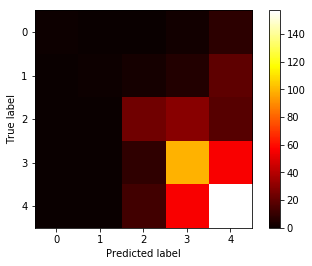

             precision    recall  f1-score   support

    score 0    1.00000   0.09091   0.16667        11
    score 1    1.00000   0.03333   0.06452        30
    score 2    0.48980   0.33333   0.39669        72
    score 3    0.51295   0.60366   0.55462       164
    score 4    0.60618   0.69469   0.64742       226

avg / total    0.59122   0.56064   0.53600       503



In [23]:
y_pred=model.predict(X)
confusion_matrix,classification_report=save_metrics(y,y_pred,categories)
print(classification_report)

# Identifying the most relevent features

We have used 'Tree based feature selection' for identifying the most relevent features.Tree-based estimators can be used to    compute feature importances, which in turn can be used to discard irrelevant feature

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
classi = ExtraTreesClassifier(n_estimators=50)
classi = classi.fit(X, y)
arr=classi.feature_importances_
indices=arr.argsort()[-5:][::-1]

In [25]:
for index in indices:
    print(data.columns[index])


Nr. reviews
Nr. hotel reviews
Helpful votes
Member years
Hotel stars


# Conclusion

Through the dataset we found that '5' is the score ,given by maximum reviewers.And also after training the model we found that
1)Nr. reviews
2)Nr. hotel reviews
3)Helpful votes
4)Member years
5)Hotel stars
are the most relevent features that determine the score given by a reviewer.